<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/14_matplotlib_%EA%B3%A0%EA%B8%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['figure.dpi'] = 100

In [2]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet = False)

import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory = False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 68.3MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [3]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)

In [4]:
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]

In [5]:
ns_book9 = ns_book9.groupby(by = ['출판사', '발행년도']).sum()

In [6]:
ns_book9 = ns_book9.reset_index()
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


In [7]:
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

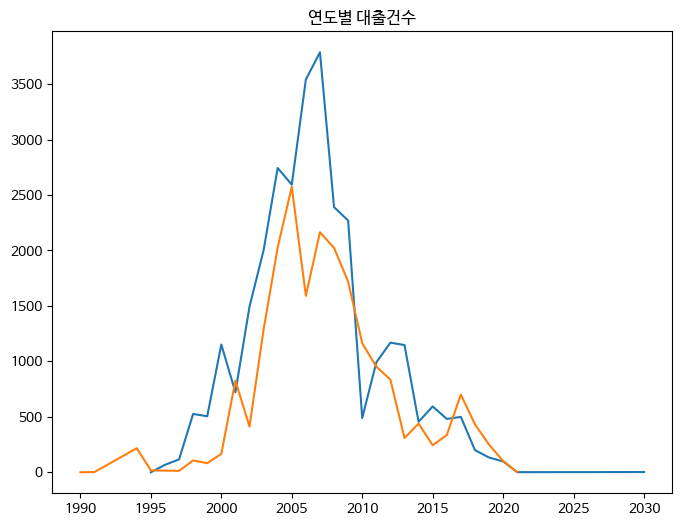

In [8]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('연도별 대출건수')
fig.show()

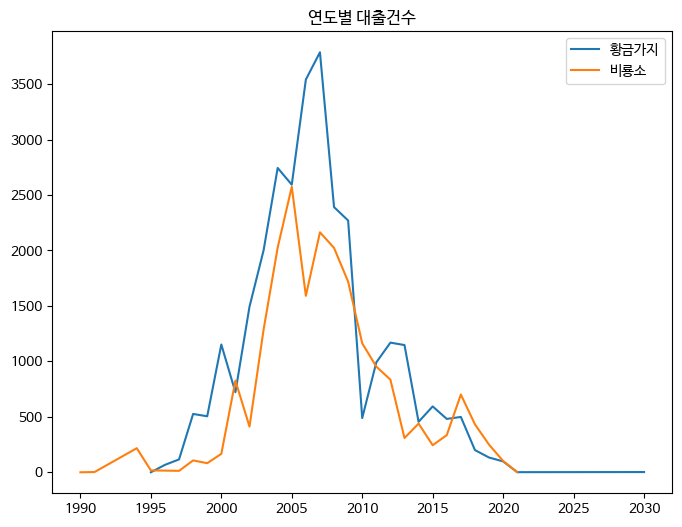

In [9]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label = '황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label = '비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

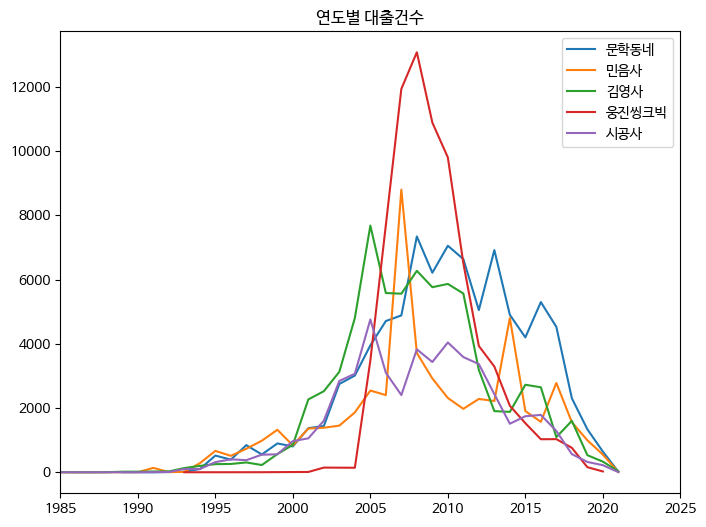

In [10]:
fig, ax = plt.subplots(figsize = (8, 6))
for pub in top30_pubs.index[:5]:
  line = ns_book9[ns_book9['출판사'] == pub]
  ax.plot(line['발행년도'], line['대출건수'], label = pub)
ax.set_title('연도별 대출건수')
ax.legend()
ax.set_xlim(1985, 2025)
fig.show()

In [11]:
ns_book10 = ns_book9.pivot_table(index = '출판사', columns = '발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [12]:
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

In [14]:
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)

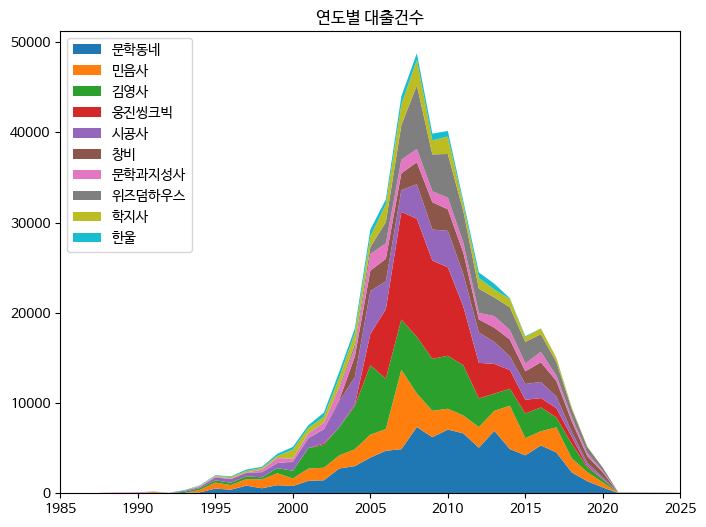

In [15]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels = top10_pubs)    # matplotlib은 판다스 데이터프레임의 누락값을 제대로 처리 못하기 때문에 그래프 작성 시 결측 대체 필요
ax.set_title('연도별 대출건수')
ax.legend(loc = 'upper left')
ax.set_xlim(1985, 2025)
fig.show()

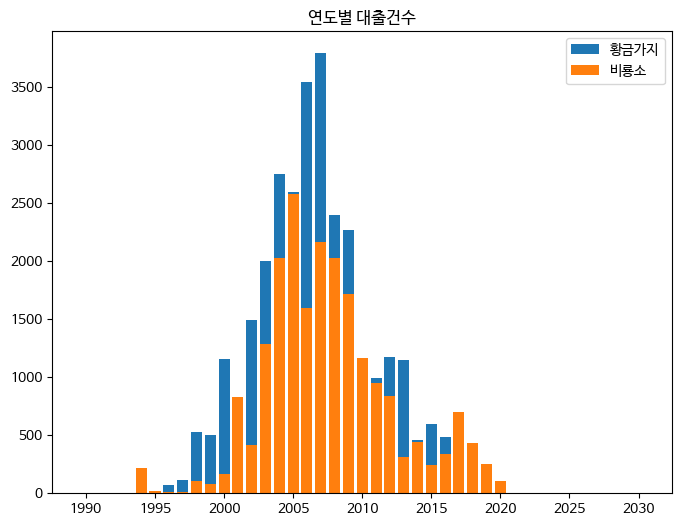

In [16]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(line1['발행년도'], line1['대출건수'], label = '황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label = '비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

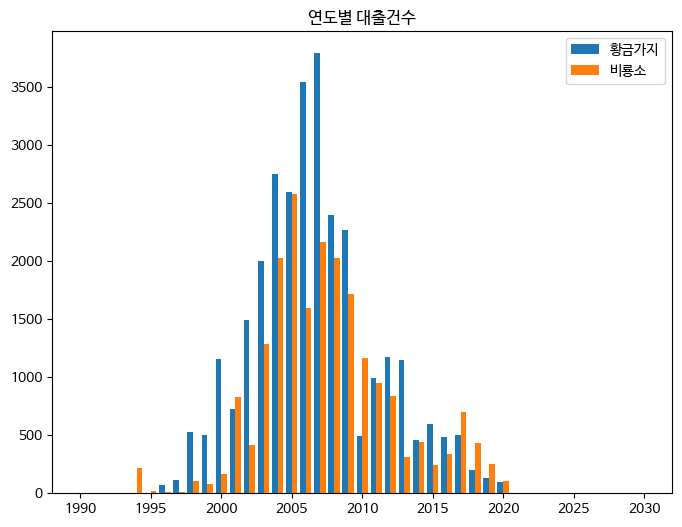

In [17]:
'''
막대 위치 조정으로 연속으로 표현
'''
fig, ax = plt.subplots(figsize = (8, 6))
ax.bar(line1['발행년도'] - 0.2, line1['대출건수'], width = 0.4, label = '황금가지')
ax.bar(line2['발행년도'] + 0.2, line2['대출건수'], width = 0.4, label = '비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

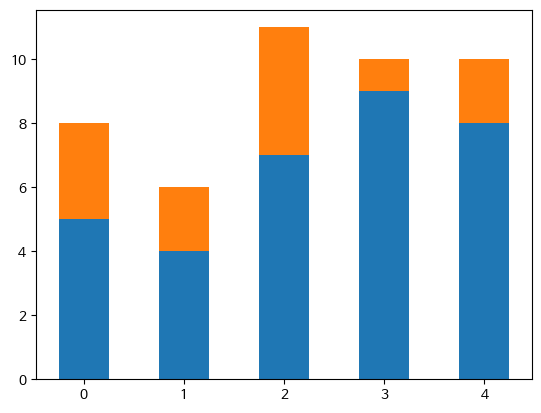

In [19]:
'''
스택 막대 그래프
- 수동으로 가능
'''
height1 = [5, 4, 7, 9, 8]
height2 = [3, 2, 4, 1, 2]

plt.bar(range(5), height1, width = 0.5)
plt.bar(range(5), height2, bottom = height1, width = 0.5)  # 시작 위치 조정
plt.show()

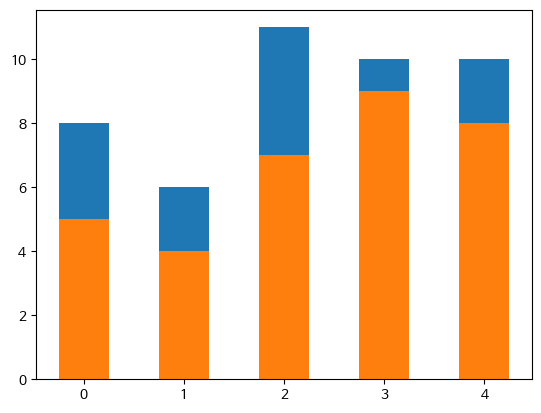

In [20]:
height3 = [a + b for a, b in zip(height1, height2)]

plt.bar(range(5), height3, width = 0.5)
plt.bar(range(5), height1, width = 0.5)
plt.show()

In [21]:
'''
데이터 누적

-> cumsum()
'''
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수', 2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [22]:
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수', 2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [23]:
ns_book12 = ns_book10.loc[top10_pubs].cumsum()

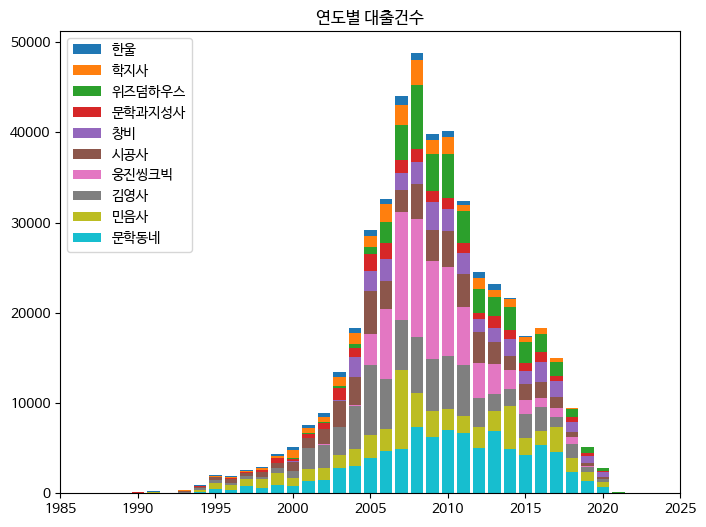

In [24]:
'''
누적 활용 스택 막대 그래프 그리기
'''
fig, ax = plt.subplots(figsize = (8, 6))
for i in reversed(range(len(ns_book12))):
  bar = ns_book12.iloc[i]
  label = ns_book12.index[i]
  ax.bar(year_cols, bar, label = label)
ax.set_title('연도별 대출건수')
ax.legend(loc = 'upper left')
ax.set_xlim(1985, 2025)
fig.show()

In [25]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

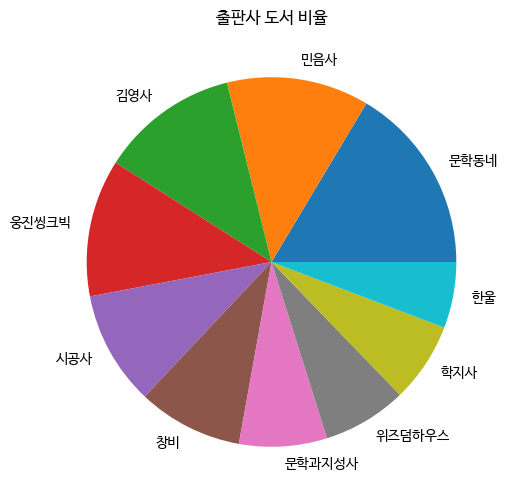

In [26]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.pie(data, labels = labels)
ax.set_title('출판사 도서 비율')
fig.show()

# 파이그래프는 3시부터 반시계로 그려짐

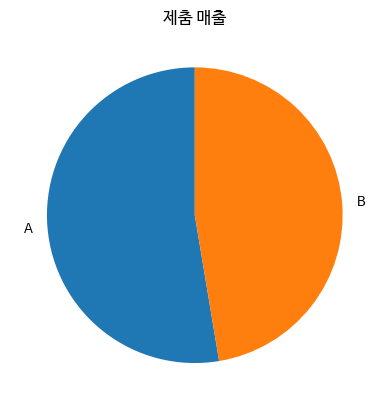

In [27]:
'''
시작점을 12시 조정

-> startangle 매개변수 조정
'''
plt.pie([10, 9], labels = ['A', 'B'], startangle = 90)
plt.title('제춤 매출')
plt.show()

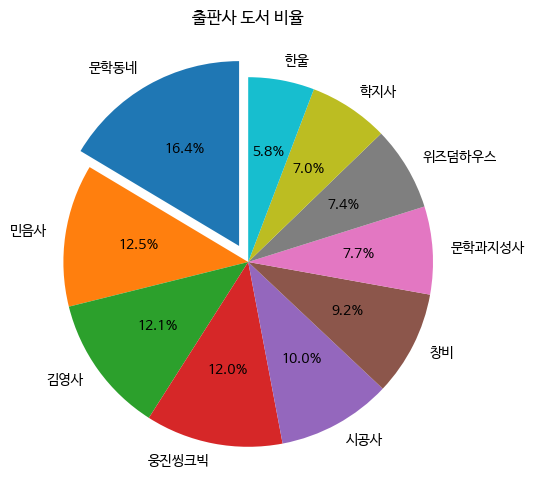

In [31]:
'''
비율 표시, 부채꼴 강조
'''
fig, ax = plt.subplots(figsize = (8, 6))
ax.pie(data, labels = labels, startangle = 90, autopct = '%.1f%%', explode = [0.1] + [0]*9)  # autopct = '%.1f%%' = 소수점 1자리까지
ax.set_title('출판사 도서 비율')
fig.show()

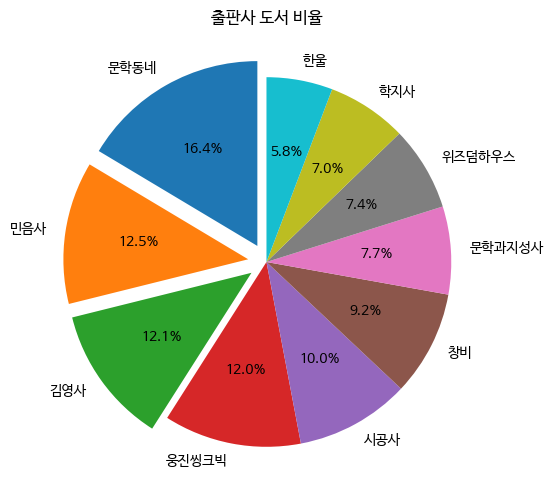

In [32]:
'''
비율 표시, 부채꼴 강조
'''
fig, ax = plt.subplots(figsize = (8, 6))
ax.pie(data, labels = labels, startangle = 90, autopct = '%.1f%%', explode = [0.1]*3 + [0]*7)  # autopct = '%.1f%%' = 소수점 1자리까지
ax.set_title('출판사 도서 비율')
fig.show()

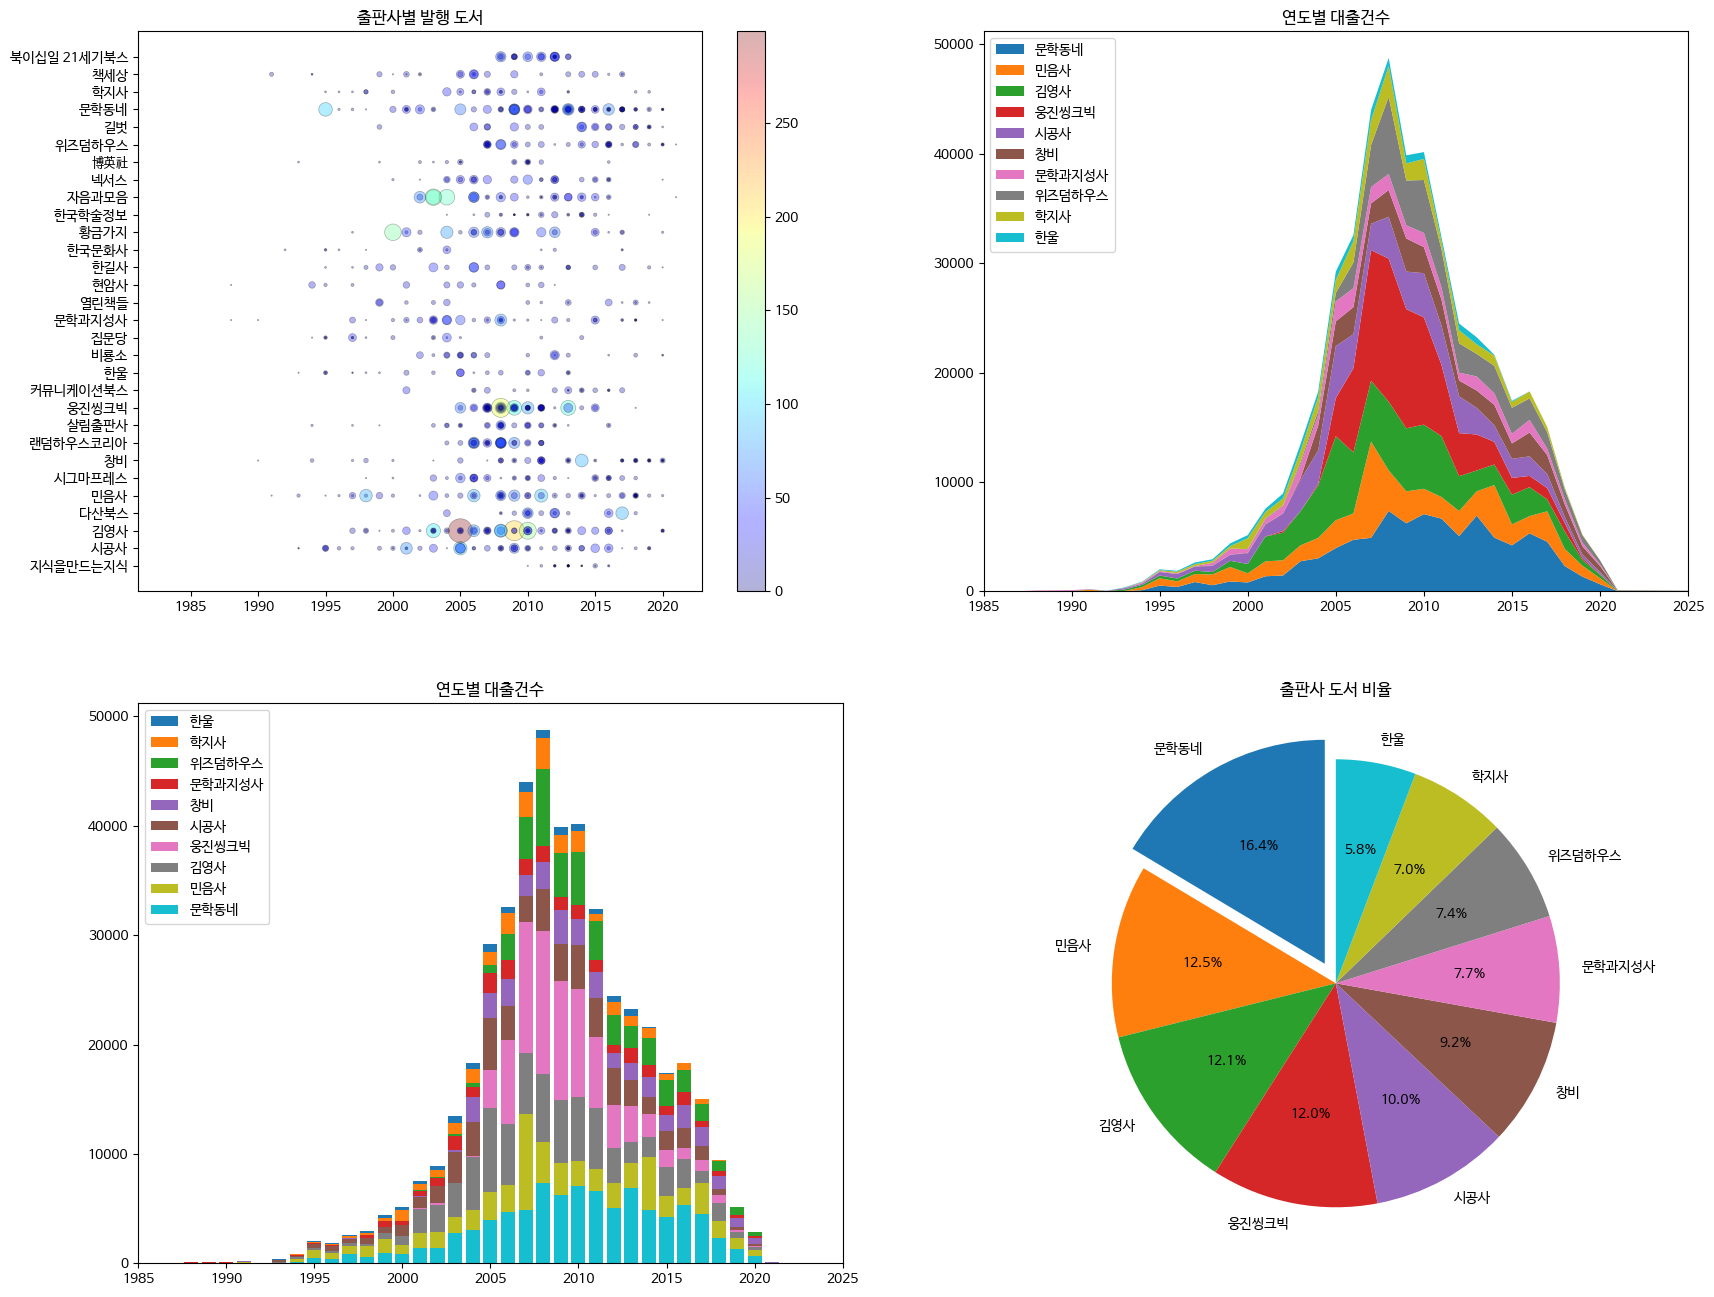

In [33]:
'''
여러종류 서브플롯 그리기
'''
fig, axes = plt.subplots(2, 2, figsize = (20, 16))

#산점도
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state = 42)
sc = axes[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths = 0.5, edgecolors = 'k', alpha = 0.3, s = ns_book8['대출건수'], c = ns_book8['대출건수'], cmap = 'jet')
axes[0, 0].set_title('출판사별 발행 도서')
fig.colorbar(sc, ax = axes[0, 0])

# 스택 영역 그래프
axes[0, 1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels = top10_pubs)
axes[0, 1].set_title('연도별 대출건수')
axes[0, 1].legend(loc = 'upper left')
axes[0, 1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(ns_book12))):
  bar = ns_book12.iloc[i]
  label = ns_book12.index[i]
  axes[1, 0].bar(year_cols, bar, label = label)
axes[1, 0].set_title('연도별 대출건수')
axes[1, 0].legend(loc = 'upper left')
axes[1, 0].set_xlim(1985, 2025)

# 원 그래프
axes[1, 1].pie(data, labels = labels, startangle = 90, autopct = '%.1f%%', explode = [0.1] + [0]*9)
axes[1, 1].set_title('출판사 도서 비율')

fig.savefig('all_in_one.png')
fig.show()

In [34]:
'''
판다스로 그래프 그리기
'''
ns_book11 = ns_book9.pivot_table(index = '발행년도', columns = '출판사', values = '대출건수')
ns_book11.loc[2000:2005]

출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


In [35]:
import numpy as np

ns_book11 = ns_book7[top30_pubs_idx].pivot_table(index = '발행년도', columns = '출판사', values = '대출건수', aggfunc = np.sum)
ns_book11.loc[2000:2005]

출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


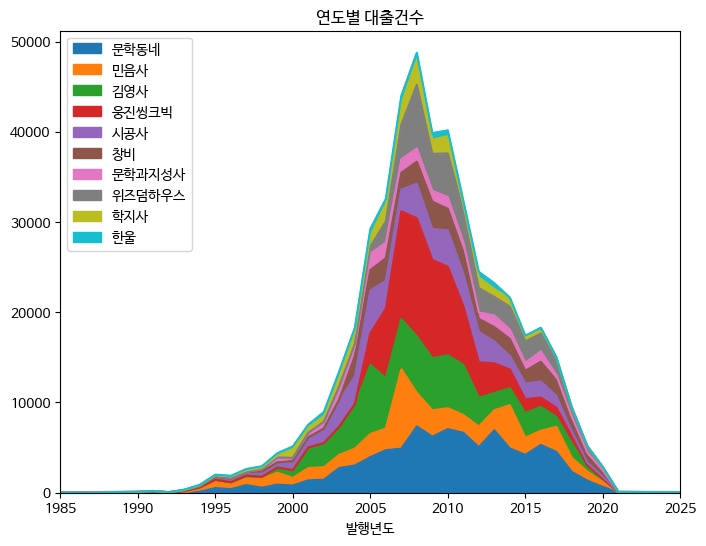

In [37]:
fig, ax = plt.subplots(figsize = (8, 6))
ns_book11[top10_pubs].plot.area(ax = ax, title = '연도별 대출건수', xlim = (1985, 2025))
ax.legend(loc = 'upper left')
fig.show()

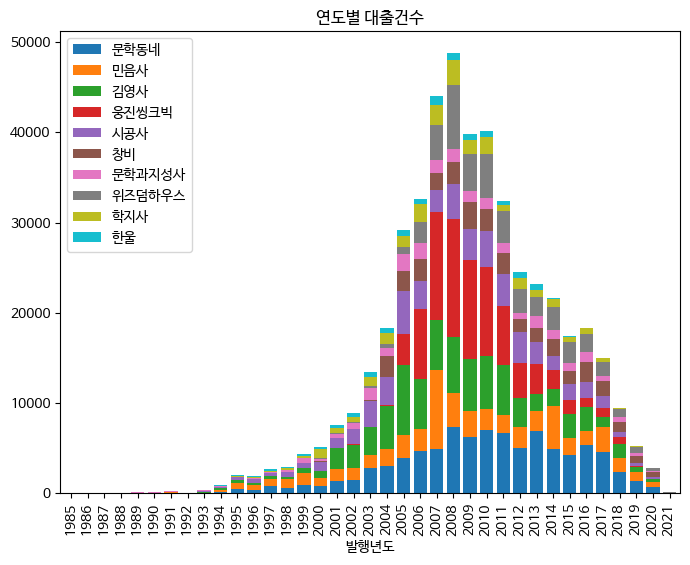

In [38]:
fig, ax = plt.subplots(figsize = (8, 6))
ns_book11.loc[1985:2025, top10_pubs].plot.bar(ax = ax, title = '연도별 대출건수', stacked = True, width = 0.8)
ax.legend(loc = 'upper left')
fig.show()

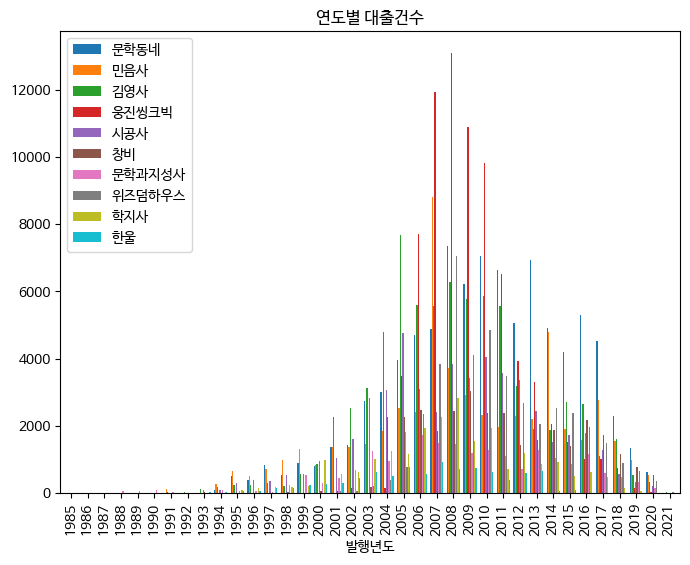

In [42]:
fig, ax = plt.subplots(figsize = (8, 6))
ns_book11.loc[1985:2025, top10_pubs].plot.bar(ax = ax, title = '연도별 대출건수', width = 0.8)
ax.legend(loc = 'upper left')
fig.show()